In [1]:
# only adjust settings in this cell
state = 'AL'
root_name = 'Jefferson'    # which county will root our district (or county_cluster==multi-district)?
k = 7                      # the state has this number of districts
deviation = 1              # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 2                   # size=1 for single district, size=2 for double district, ...
obj_type = 'polsby_popper' # compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = 'C:\\districting-data-2020\\'
filename = state + '_county.json'

from cluster import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a multi-district (county cluster) of size =",G._size)

State has total of k = 7 districts
We seek a multi-district (county cluster) of size = 2


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 717754
Single district upper population limit U = 717755


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Jefferson County to be the root. In our graph, this is vertex # 22


In [6]:
from cluster import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-11
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-4790 CPU @ 3.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 548 rows, 650 columns and 2841 nonzeros
Model fingerprint: 0xefece717
Model has 1 quadratic constraint
Variable types: 345 continuous, 305 integer (305 binary)
Coefficient statistics:
  Matrix range     [1e-02, 7e+05]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+06]
Presolve removed 76 rows and 74 columns
Presolve time: 0.01s
Presolved: 472 rows, 576 columns, 2534 nonzeros
Presolved model has 1 quadratic constraint(s)
Variable types: 339 continuous, 23

 1581901 670206    5.58832   40   42          -    3.73413      -  15.4  260s
 1600011 677415    3.76858   34   48          -    3.74021      -  15.3  265s
 1617963 684400    4.26506   37   17          -    3.74647      -  15.3  270s
 1636510 692018    8.79588   54   12          -    3.75286      -  15.3  275s
 1654744 698944    6.29276   49    7          -    3.75878      -  15.3  280s
 1673379 706437    5.48824   49    7          -    3.76535      -  15.3  285s
 1692063 713847    5.11415   48   21          -    3.77159      -  15.3  290s
 1710196 721420 infeasible   51               -    3.77786      -  15.3  295s
 1727324 728521    8.30340   46   24          -    3.78327      -  15.3  300s
 1747036 736104 infeasible   46               -    3.78931      -  15.3  305s
 1765464 743052 infeasible   58               -    3.79535      -  15.2  310s
 1782700 750372    6.80433   55   18          -    3.80073      -  15.2  315s
 1800245 757444 infeasible   59               -    3.80633      

 2615003 1073598    4.32612   46    7          -    4.03189      -  14.8  605s
 2627506 1078080 infeasible   59               -    4.03546      -  14.8  610s
 2641350 1082999    4.12586   42   66          -    4.03936      -  14.8  615s
 2654376 1087659    5.60552   53   17          -    4.04296      -  14.8  620s
 2667965 1092135    5.32684   36    5          -    4.04675      -  14.8  625s
 2681130 1096585    6.43825   49   24          -    4.05067      -  14.8  630s
 2693830 1100924    4.91612   47   28          -    4.05416      -  14.8  635s
 2706752 1105330    5.56749   52    9          -    4.05765      -  14.8  640s
 2719636 1109601 infeasible   53               -    4.06123      -  14.8  645s
 2732023 1113740    4.56686   46   20          -    4.06456      -  14.8  650s
 2744604 1118123    4.61878   32   16          -    4.06826      -  14.8  655s
 2757665 1122660    5.10260   38    8          -    4.07213      -  14.8  660s
 2771570 1127096    6.29639   56   10          -    

 3752929 1448773    6.00586   49   12          -    4.30918      -  14.4 1055s
 3765263 1452721    5.36591   37   12          -    4.31164      -  14.4 1060s
found district [0, 2, 17, 22, 36, 39, 45, 50, 54, 56, 58, 64] with objective = 4.98516976436997
   replaced worse solution with objective = 6.736053135560433
adding cut saying that objective should be less than 6.597623806376309
 3777657 1456282    4.73631   45   26          -    4.31413      -  14.4 1065s
 3788643 1459705    4.70924   49    4          -    4.31684      -  14.4 1070s
 3801361 1463058 infeasible   50               -    4.31959      -  14.4 1075s
found district [4, 14, 15, 16, 22, 23, 27, 32, 35, 43, 50, 54, 64, 66] with objective = 6.448208421135085
   replaced worse solution with objective = 6.597623806376309
adding cut saying that objective should be less than 6.448208421135085
 3813151 1466812    5.81674   42    7          -    4.32211      -  14.4 1080s
 3825459 1470234 infeasible   58               -    4.3248

 4783033 1732547    5.32746   54    6          -    4.51701      -  14.1 1530s
 4793787 1734828    5.07872   39   14          -    4.51938      -  14.1 1535s
 4804467 1737473    5.37656   54   28          -    4.52159      -  14.1 1540s
 4814067 1739662    5.25497   49   13          -    4.52361      -  14.1 1545s
 4825849 1742054    5.83230   41   38          -    4.52603      -  14.1 1550s
 4834939 1744151 infeasible   59               -    4.52787      -  14.1 1555s
 4845508 1746769 infeasible   55               -    4.53027      -  14.1 1560s
 4854777 1748816    5.74462   47   19          -    4.53225      -  14.1 1565s
 4864887 1751080 infeasible   40               -    4.53442      -  14.1 1570s
 4875448 1753209    5.39537   33   18          -    4.53671      -  14.1 1575s
 4884329 1755135    4.65089   43    7          -    4.53868      -  14.1 1580s
 4894321 1757378 infeasible   53               -    4.54066      -  14.1 1585s
 4903682 1759571    5.39518   36   20          -    

 5656106 1906263    5.02628   47    7          -    4.69361      -  13.9 2005s
 5665096 1907746 infeasible   55               -    4.69527      -  13.9 2010s
 5674607 1909180 infeasible   49               -    4.69721      -  13.9 2015s
 5681810 1910553    4.88265   58    5          -    4.69866      -  13.9 2020s
 5691738 1912482    5.51535   38   21          -    4.70047      -  13.9 2025s
 5700410 1913935    4.71597   54    6          -    4.70216      -  13.9 2030s
 5709854 1915263 infeasible   53               -    4.70405      -  13.9 2035s
 5718592 1916535 infeasible   42               -    4.70587      -  13.9 2040s
 5726423 1917921 infeasible   55               -    4.70737      -  13.9 2045s
 5734972 1919283    4.90472   36    5          -    4.70911      -  13.9 2050s
 5740260 1920262    5.06876   53   10          -    4.71017      -  13.9 2055s
 5746998 1921259    5.77279   43    6          -    4.71152      -  13.9 2060s
 5753359 1922402    5.74105   41    6          -    

 6383711 1972068 infeasible   41               -    4.85502      -  13.7 2460s
 6391952 1969985 infeasible   45               -    4.85835      -  13.7 2465s
 6399999 1968058    4.98553   41   18          -    4.86154      -  13.7 2470s
 6407673 1966449 infeasible   46               -    4.86441      -  13.7 2475s
found district [0, 1, 2, 9, 11, 13, 22, 23, 33, 36, 37, 39, 43, 45, 46, 53, 56, 57, 65] with objective = 4.864973157275211
   replaced worse solution with objective = 5.237834618922292
adding cut saying that objective should be less than 4.98516976436997
 6416078 1961097 infeasible   44               -    4.86966      -  13.7 2480s
 6424135 1955700 infeasible   49               -    4.87515      -  13.7 2485s
 6432145 1950179 infeasible   45               -    4.88085      -  13.7 2490s
 6440503 1944615    4.96773   42   27          -    4.88669      -  13.7 2495s
 6448909 1938455 infeasible   45               -    4.89314      -  13.7 2500s
 6457057 1932351 infeasible   53  

In no particular order, the top 10 clusters are:


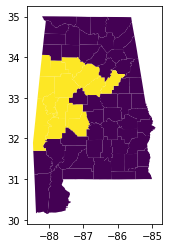

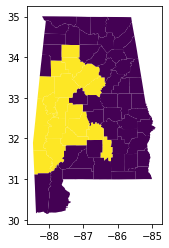

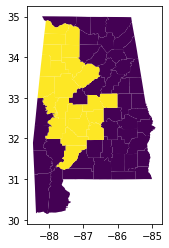

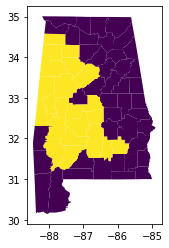

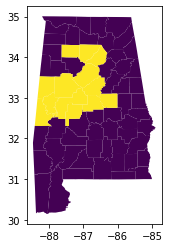

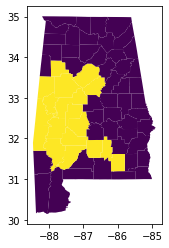

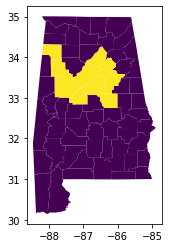

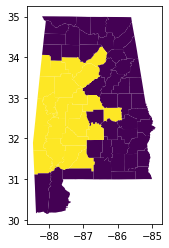

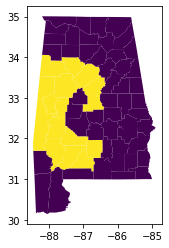

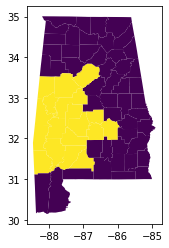

In [7]:
# Draw the districting plans
from cluster import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for p in range(len(districts)):
    draw_single_district( filepath, filename, G, districts[p], zoom=False )